# Huỳnh Minh Huấn - 1612858

## Bài tập 04

In [1]:
import numpy as np
import math

In [2]:
def lowerBound(ep, dvc, sigma):
    N = 1
    for i in range(100):
        N = 8 / (ep * ep) *np.log((4 * math.pow((2*N), dvc) + 4) / sigma)
    return N

In [3]:
lowerBound(0.05, 10, 0.05)

452956.8647230992

## 1.
- Tìm $N$ bằng cách giải phương trình: $\epsilon = \sqrt{\frac{8}{N} ln \frac{4m_\mathcal{H}(2N)}{\delta} } $.

- Thay số, ta được: ${0.05^2 = \frac{8}{N}*ln(\frac{4*(2*N)^{10}}{0.05})}$

${\Leftrightarrow \frac{N * 0.05^2}{8} - ln(80) - 10*ln(2*N) = 0}$

Giải phương trình bằng máy tinh casio thì được nghiệm: **452956.8647**

tương tự kết quả chạy hàm lowerBound ở trên là dựa vào công thức (2.13 - trang 57) trong sách Learning from data của giáo sư.

chọn đáp án xấp xỉ gần nhất của sample size là **460000**

**Chọn [d] 460000.**

---

Em giải pt bậc 2 theo epsilon
Vì N = 10000 > dvc = 50, nên ${m_H(N) = N^{d_{vc}}}$

2.c. ${10000*\epsilon^2 - 2*\epsilon - ln(\frac{6*20000^{50}}{0.05})\leq0}$

2.d. ${(2*10000 - 4)*\epsilon^2 - 4*\epsilon - ln(\frac{4*(10000^2)^{50}}{0.05})\leq0}$

${\Leftrightarrow (2*10000 - 4)*\epsilon^2 - 4*\epsilon -ln(80) - 100ln(10000)\leq0}$

### Code câu 2

In [4]:
#Cau 2
N = 10000
dvc = 50
sigma = 0.05
print("Original VC Bound:", math.sqrt(8/N *np.log(4 * math.pow(2*N, dvc)/sigma)))

print("Rademacher Penalty Bound:", math.sqrt(2*np.log(math.pow(2*N, dvc + 1))/N) + math.sqrt(2*np.log(1/sigma)/N)+1/N)

# delta cho ham bac 2 cua bat phuong trinh cau 2 c
deltaC = math.pow(1, 2) - N * (-np.log(6*math.pow(2*N, dvc)/sigma))
print("Parrondo and Van den Broek:", (1 + math.sqrt(deltaC))/N)

#delta cho ham bac 2 cua bat phuong trinh cau 2 d
deltaD = math.pow(2, 2) - (2 * N - 4) * (-(np.log(80) + 100* np.log(N)))
print("Devroye:", (2 + math.sqrt(deltaD))/(2 * N - 4))

Original VC Bound: 0.632174915200836
Rademacher Penalty Bound: 0.3424069399356495
Parrondo and Van den Broek: 0.2236982936807856
Devroye: 0.21522804980824667


## 2.
Ta thấy kết quả trên chặn trên theo Devroye là **0.215228...** là chặn trên nhỏ nhất.

**Chọn [d]**

---

Em giải pt bậc 2 theo epsilon
Vì N = 5 < dvc = 50, nên ${m_H(N) = 2^N}$

3.c. ${5*\epsilon^2 - 2*\epsilon - ln(\frac{6*2^{2*5}}{0.05})\leq0}$

3.d. ${(2*5 - 4)*\epsilon^2 - 4*\epsilon - ln(\frac{4*2^{5^2}}{0.05})\leq0}$

### Code câu 3

In [5]:
#Cau 3
N = 5
dvc = 50
sigma = 0.05
print("Original VC Bound:", math.sqrt(8/N *np.log(4 * math.pow(2, 2*N)/sigma)))

print("Rademacher Penalty Bound:", math.sqrt(2*np.log(2*N*math.pow(2, N))/N) + math.sqrt(2*np.log(1/sigma)/N)+1/N)

# delta cho ham bac 2 cua bat phuong trinh cau 2 c
deltaC = math.pow(1, 2) - N * (-np.log(6*math.pow(2, 2*N)/sigma))
print("Parrondo and Van den Broek:", (1 + math.sqrt(deltaC))/N)

#delta cho ham bac 2 cua bat phuong trinh cau 2 d
deltaD = math.pow(2, 2) - (2 * N - 4) * (-np.log(4 * math.pow(2, math.pow(N, 2))/sigma))
print("Devroye:", (2 + math.sqrt(deltaD))/(2 * N - 4))

Original VC Bound: 4.254597220000659
Rademacher Penalty Bound: 2.813654929686762
Parrondo and Van den Broek: 1.74395359699581
Devroye: 2.264540762867992


## 3.
Ta thấy kết quả trên chặn trên theo **Parrondo and Van den Broek** là **1.74395359699581** là chặn trên nhỏ nhất.

**Chọn [c]**

---

## Câu 4-7: Bias and Variance
<font color=blue>Tính $\bar{g}(\mathbf{x})$</font> 

Ta có thể code nhanh chóng hàm phát sinh ngẫu nhiên một tập dữ liệu $\mathcal{D}$ có kích thước $N$ ($x$ được phát sinh ngẫu nhiên theo phân bố đều trong đoạn [-1, 1], $y=sin(\pi x)$):

In [6]:
def generate_dataset(N):
    X = np.random.uniform(-1, 1, (N, 1))
    Y = np.sin(np.pi * X)
    return X, Y
generate_dataset(2)

(array([[0.71718477],
        [0.76785029]]), array([[0.7761206 ],
        [0.66636262]]))

In [7]:
X, Y = generate_dataset(2)
print(X)
print(Y)

[[ 0.69636383]
 [-0.07791036]]
[[ 0.81567855]
 [-0.24232601]]


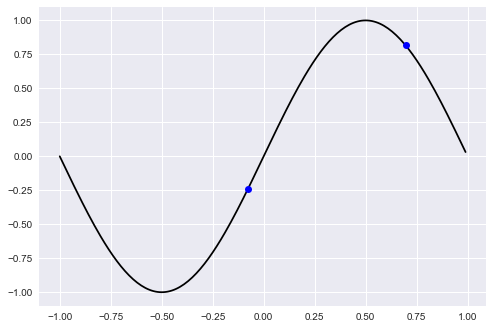

In [8]:
# Trực quan hóa hàm f và 2 điểm dữ liệu được phát sinh ở trên
%matplotlib inline
import matplotlib.pylab as plt
plt.style.use("seaborn")

xx = np.arange(-1, 1, 0.01).reshape(-1, 1)
yy = np.sin(np.pi * xx)
plt.plot(xx, yy, color="black")
plt.plot(X, Y, "o", color="blue")

In [9]:
def linearRegression(X, Y):
    A = np.dot(X.T, X)
    b = np.dot(X.T, Y)
    w = np.dot(np.linalg.pinv(A), b)
    return w
X, Y = generate_dataset(2)

In [10]:
def find_a_average(N = 1000):
    a = np.zeros(N)
    for i in range(N):
        X, Y = generate_dataset(2)
        a[i] = np.sum(linearRegression(X, Y))
    return (np.mean(a))

In [11]:
find_a_average(10000)

1.4370707509940468

# 4.
Ta thấy rằng ${\bar{a} \approx 1.43}$ với giá trị N = 10000. Do đó không có giá trị nào ở trong đáp án thỏa.

**Chọn [e] None of the above.**

---

#### Hàm find_Bias_Var(N) tính bias và var cho hypothesis h(x) = ax

Giá trị trả về là Bias, Var

In [12]:
def find_Bias_Var(N = 1000):
    a_arr = np.zeros(N)
    f = []
    X_arr = []
    Bias = 0
    Var = 0
    for i in range(N):
        X, Y = generate_dataset(2)
        f.append([Y[0, 0],Y[1, 0]])
        X_arr.append([X[0, 0], X[1, 0]])
        a_arr[i] = np.sum(linearRegression(X, Y))
    a_bar = np.mean(a_arr)
    for i in range(N):
        Bias += math.pow(a_bar*X_arr[i][0] - f[i][0], 2) + math.pow(a_bar*X_arr[i][1] - f[i][1], 2)
        Var += math.pow((a_arr[i] - a_bar) * X_arr[i][0], 2) + math.pow((a_arr[i] - a_bar) * X_arr[i][1], 2)
    Bias /= (N * 2)
    Var /= (N * 2)
    return Bias, Var

In [13]:
find_Bias_Var(N = 10000)

(0.2700335034784945, 0.202865955178175)

## 5.
Chạy hàm find_Bias_Var(N) với N = 10000, ta được kết quả bias xấp xỉ **0.278..** Do đó giá trị gần nhất với bias là 0.3

**Chọn [b] 0.3.**

---

## 6.
Chạy hàm find_Bias_Var(N) với N = 10000, ta được kết quả Var xấp xỉ **0.2..** Do đó giá trị gần nhất với Var là 0.2 

**Chọn [a] 0.2.**

---

#### Hàm generate_dataset_b cho hypotheses h(x) = b và find_E_Eout cho [a]

In [14]:
def generate_dataset_b():
    Y = np.sin(np.pi * np.random.uniform(-1, 1, (2, 1)))
    X = np.array([[1], [1]])
    return X, Y
#X, Y = generate_dataset_b()
#linearRegression(X, Y)
def find_E_Eout_0(N):
    a_arr = np.zeros(N) # Danh sách các g_d được phát sinh
    f = [] # chứa f(x)
    X_arr = [] # chứa x
    Bias = 0
    Var = 0
    for i in range(N):
        X, Y = generate_dataset_b()
        f.append([Y[0, 0],Y[1, 0]])
        X_arr.append([X[0, 0], X[1, 0]])
        a_arr[i] = np.sum(linearRegression(X, Y))
    a_bar = np.mean(a_arr)
    for i in range(N):
        Bias += math.pow(a_bar - f[i][0], 2) + math.pow(a_bar - f[i][1], 2)
        Var += math.pow((a_arr[i]) * X_arr[i][0] - a_bar, 2) + math.pow((a_arr[i]) * X_arr[i][1]  - a_bar, 2)
    Bias /= (N * 2)
    Var /= (N * 2)
    return Bias + Var

#### Hàm find_E_Eout cho [b]

In [15]:
def find_E_Eout_1(N):
    a_arr = np.zeros(N) # Danh sách các g_d được phát sinh
    f = [] # chứa f(x)
    X_arr = [] # chứa x
    Bias = 0
    Var = 0
    for i in range(N):
        X, Y = generate_dataset(2)
        f.append([Y[0, 0],Y[1, 0]])
        X_arr.append([X[0, 0], X[1, 0]])
        a_arr[i] = np.sum(linearRegression(X, Y))
    a_bar = np.mean(a_arr)
    for i in range(N):
        Bias += math.pow(a_bar*X_arr[i][0] - f[i][0], 2) + math.pow(a_bar*X_arr[i][1] - f[i][1], 2)
        Var += math.pow((a_arr[i] - a_bar) * X_arr[i][0], 2) + math.pow((a_arr[i] - a_bar) * X_arr[i][1], 2)
    Bias /= (N * 2)
    Var /= (N * 2)
    return Bias + Var

#### Hàm generate_dataset_ax_b cho hypotheses h(x) = ax + b và find_E_Eout cho [c]

In [16]:
def generate_dataset_ax_b():
    X = np.random.uniform(-1, 1, (2, 1))
    Y = np.sin(np.pi * X)
    X = np.hstack((np.ones((2, 1)), X))
    return X, Y
#X, Y = generate_dataset_ax_b()
#print(X)
#print(Y)
#linearRegression(X, Y).reshape(1, 2)
def find_E_Eout_2(N = 1000):
    g_arr = [] # Danh sách các g_d được phát sinh
    f = [] # chứa f(x)
    X_arr = [] # chứa x
    Bias = 0
    Var = 0
    for i in range(N):
        X, Y = generate_dataset_ax_b()
        f.append([Y[0, 0],Y[1, 0]])
        X_arr.append([X[0, 1], X[1, 1]])
        g_arr.append(linearRegression(X, Y).reshape(1, 2))
    g_bar = np.mean(g_arr, 0)
    for i in range(N):
        # Bias = Ex[(g_bar(x) - f(x))^2]
        Bias += math.pow(g_bar[0][0]+ X_arr[i][0] * g_bar[0][1] - f[i][0], 2) + math.pow(g_bar[0][0] + X_arr[i][1] * g_bar[0][1]- f[i][1], 2)
        #Var = Ex[Ed[(gd(x) - g_bar(x))^2]]
        Var += math.pow((g_arr[i][0][1] - g_bar[0][1]) * X_arr[i][0], 2) + math.pow((g_arr[i][0][1] - g_bar[0][1]) * X_arr[i][1], 2)
    Bias /= (N * 2)
    Var /= (N * 2)
    return Bias + Var

#### Hàm generate_dataset_ax_2 cho hypotheses h(x) = ax^2 và find_E_Eout cho [d]

In [17]:
def generate_dataset_ax_2():
    X = np.random.uniform(-1, 1, (2, 1))
    X = X*X #Tạo X^2
    Y = np.sin(np.pi * X)
    return X, Y
#X, Y = generate_dataset_ax_2()
#print(X)
#print(Y)
linearRegression(X, Y)
def find_E_Eout_3(N):
    a_arr = np.zeros(N) # Danh sách các g_d được phát sinh
    f = [] # chứa f(x)
    X_arr = [] # chứa x
    Bias = 0
    Var = 0
    for i in range(N):
        X, Y = generate_dataset_ax_2()
        f.append([Y[0, 0],Y[1, 0]])
        X_arr.append([X[0, 0], X[1, 0]])
        a_arr[i] = np.sum(linearRegression(X, Y))
    a_bar = np.mean(a_arr)
    for i in range(N):
        Bias += math.pow(a_bar*X_arr[i][0] - f[i][0], 2) + math.pow(a_bar*X_arr[i][1] - f[i][1], 2)
        Var += math.pow((a_arr[i] - a_bar) * X_arr[i][0], 2) + math.pow((a_arr[i] - a_bar) * X_arr[i][1], 2)
    Bias /= (N * 2)
    Var /= (N * 2)
    return Bias + Var

#### Hàm generate_dataset_ax_2_b cho hypotheses h(x) = ax^2 + b và find_E_Eout cho [e]

In [18]:
def generate_dataset_ax_2_b():
    X = np.random.uniform(-1, 1, (2, 1))
    X = X*X # Tạo x^2
    Y = np.sin(np.pi * X) #Tính Y theo X
    X = np.hstack((np.ones((2, 1)), X)) # Thêm một cột 1 vào X
    return X, Y
#linearRegression(X, Y).reshape(1, 2)
def find_E_Eout_4(N = 1000):
    g_arr = [] # Danh sách các g_d được phát sinh
    f = [] # chứa f(x)
    X_arr = [] # chứa x
    Bias = 0
    Var = 0
    for i in range(N):
        X, Y = generate_dataset_ax_2_b()
        f.append([Y[0, 0],Y[1, 0]])
        X_arr.append([X[0, 1], X[1, 1]])
        g_arr.append(linearRegression(X, Y).reshape(1, 2))
    g_bar = np.mean(g_arr, 0)
    for i in range(N):
        Bias += math.pow(g_bar[0][0]+ X_arr[i][1] * g_bar[0][1] - f[i][0], 2) #+ math.pow(g_bar[0][0] + X_arr[i][1] * g_bar[0][1]- f[i][1], 2)
        Var += math.pow((g_arr[i][0][1] - g_bar[0][1]) * X_arr[i][0], 2) #+ math.pow((g_arr[i][0][1] - g_bar[0][1]) * X_arr[i][1], 2)
    Bias /= (N * 2)
    Var /= (N * 2)
    return Bias + Var

In [19]:
find_E_Eout_0(N = 10000)

0.754028287807575

In [20]:
find_E_Eout_1(10000)

0.4809770866987312

In [21]:
find_E_Eout_2(N = 10000)

1.1318032567164602

In [22]:
find_E_Eout_3(N = 10000)

0.5272416361198085

In [23]:
find_E_Eout_4(N = 10000)

0.6303702792606464

## 7.

Chạy các hàm find_E_Eout_x(N) (với x = {0, 1, 2, 3, 4} là các hypotheses tương ứng a, b, c, d, e) với giá trị N = 10000.

Ta thấy kết quả hàm find_E_Eout_1 cho ra kết quả ${E[E_{out}]\approx0.46..}$ nhỏ nhất trong các ${E[E_{out}]}$ tìm được theo thứ tự xấp xỉ là:

**0.75, 0.46, 1.14, 0.53, 0.63**.

Do đó: kết quả cần tìm là ${h(x)=ax}$

**Chọn [b] ${h(x)=ax}$.**

---

## Câu 8-10: VC Dimension


## 8.
Theo đề bài:
- $m_\mathcal{H}(1)=2$.
- $m_\mathcal{H}(N+1) = 2m_\mathcal{H}(N) - \binom{N}{q}$ với $q$ là một số nguyên cố định $\ge1$. Để dễ nhìn hơn, ta có thể viết lại công thức này như sau: $m_\mathcal{H}(N) = 2m_\mathcal{H}(N-1) - \binom{N-1}{q}$.

Ta có:
    
${m_H(2) = 2*m_H(1) - \binom{2 - 1}{q} = 4 - \binom{1}{q}}$ muốn chưa break thì ${q\gt1}$.

${m_H(3) = 2*m_H(2) - \binom{3 - 1}{q} = 8 - \binom{2}{q}}$ muốn chưa break thì ${q\gt2}$.

${m_H(4) = 2*m_H(3) - \binom{4-1}{q} = 16 - \binom{3}{q}}$ muốn chưa break thì ${q\gt3}$.

...

${m_H(N) = 2*m_H(N-1) - \binom{N-1}{q} = 2^N- \binom{N-1}{q}}$ muốn chưa break thì ${q\gt N-1}$.

Suy ra: $N \lt q + 1 => N \leq q$. Mà theo định nghĩa $d_{VC}$ là giá trị N lớn nhất mà sao cho vẫn ${m_H(N) = 2^N}$

Do đó: $d_{VC} = q$ thỏa growth function trên.

**Chọn [c] q.**

---

## 9.
Sự giao nhau giữa các Hypothesis sets ${\left(\bigcap_{k = 1}^kH_k\right)}$. Ta có thể thấy rằng, $d_{VC}$ của các H giao nhau luôn nhỏ hơn hoặc bằng ${d_{vc}}$ của mỗi H 

$$
d_{VC}\left(\bigcap_{k = 1}^kH_k\right) \leq d_{VC} \mathcal({H}_i)
$$

Ta dễ dàng thấy được, chặn trên chặt nhất (tightest bound) sẽ là $\min\left\{d_{VC} \mathcal({H}_i)\right\}$.

Ta thấy chặn dưới là 0 khi các $H_i$ giao nhau bằng rỗng.

Vì vậy, $ 0\leq d_{VC}\left(\bigcap_{k = 1}^kH_k\right) \leq \min\left\{d_{VC} \mathcal({H}_i)\right\}$

**Chọn [b] $ 0\leq d_{VC}\left(\bigcap_{k = 1}^kH_k\right) \leq \min\left\{d_{VC} \mathcal({H}_i)\right\}$.**

---

## 10.